<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/UTS/RegresiUTSTelkom/Regresi_MLP_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import gdown
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [ ]:
file_id = '1iir3m4hP09fCeOyC-Igx4RwXkuVAMz6m'
output = 'RegresiUTSTelkom.csv'

# Unduh file dari Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}&confirm=t', output=output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1iir3m4hP09fCeOyC-Igx4RwXkuVAMz6m&confirm=t
To: /content/RegresiUTSTelkom.csv
100%|██████████| 443M/443M [00:05<00:00, 79.0MB/s]


'RegresiUTSTelkom.csv'

# Feature Engineering

In [ ]:
df = pd.read_csv(output)
df.columns = ['target'] + [f'feat_{i}' for i in range(1, df.shape[1])]
print("Nama kolom setelah direname:\n", df.columns.tolist()[:10])

Nama kolom setelah direname:
 ['target', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9']


In [ ]:
# Ubah target ke float
df['target'] = df['target'].astype(float)

In [ ]:
print("\nInfo Dataset:")
print(df.info())
print("\nDeskripsi Statistik:")
print(df.describe().T)


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   515344 non-null  float64
 1   feat_1   515344 non-null  float64
 2   feat_2   515344 non-null  float64
 3   feat_3   515344 non-null  float64
 4   feat_4   515344 non-null  float64
 5   feat_5   515344 non-null  float64
 6   feat_6   515344 non-null  float64
 7   feat_7   515344 non-null  float64
 8   feat_8   515344 non-null  float64
 9   feat_9   515344 non-null  float64
 10  feat_10  515344 non-null  float64
 11  feat_11  515344 non-null  float64
 12  feat_12  515344 non-null  float64
 13  feat_13  515344 non-null  float64
 14  feat_14  515344 non-null  float64
 15  feat_15  515344 non-null  float64
 16  feat_16  515344 non-null  float64
 17  feat_17  515344 non-null  float64
 18  feat_18  515344 non-null  float64
 19  feat_19  515344 non-null  float64
 20  feat_20  51

In [ ]:
print("Jumlah data duplikat:", int(df.duplicated().sum()))

Jumlah data duplikat: 214


In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.isnull().sum()

,0
target,0
feat_1,0
feat_2,0
feat_3,0
feat_4,0
...,...
feat_86,0
feat_87,0
feat_88,0
feat_89,0


In [ ]:
X = df.drop(columns='target')
y = df['target']

var_selector = VarianceThreshold(threshold=0.0)
X_var_filtered = var_selector.fit_transform(X)

# Simpan nama fitur yang lolos seleksi
selected_features = X.columns[var_selector.get_support()]
print(f"\nJumlah fitur setelah filter varian: {len(selected_features)} dari {X.shape[1]}")


Jumlah fitur setelah filter varian: 90 dari 90


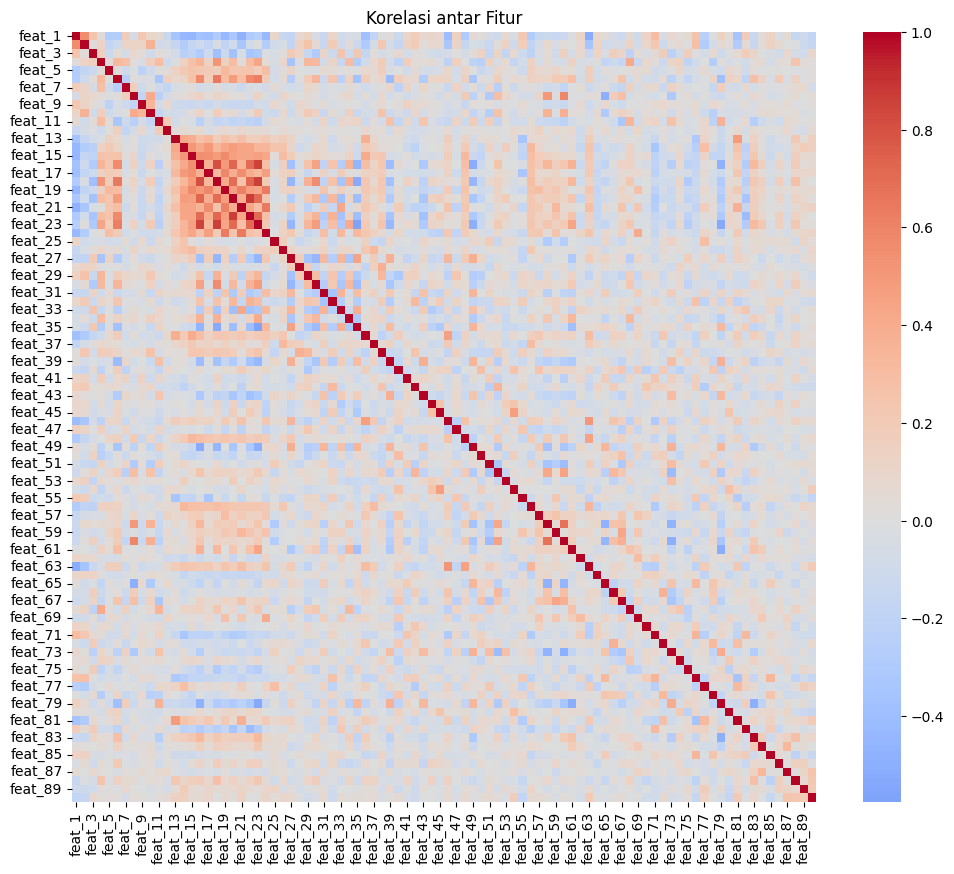

In [ ]:
corr_matrix = df[selected_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Korelasi antar Fitur")
plt.show()

In [ ]:
cor_with_target = df[selected_features].corrwith(df['target'])
cor_sorted = cor_with_target.sort_values(key=np.abs, ascending=False)

top_features = cor_sorted.head(10).index.tolist()
print("\nTop 10 fitur dengan korelasi tertinggi terhadap target:")
print(cor_sorted.head(10))


Top 10 fitur dengan korelasi tertinggi terhadap target:
feat_1     0.225345
feat_6    -0.187441
feat_3    -0.139575
feat_63   -0.126319
feat_40   -0.123996
feat_7     0.110461
feat_67   -0.102841
feat_46   -0.101340
feat_36   -0.101050
feat_69   -0.099486
dtype: float64


In [ ]:
print("\nOutlier Berdasarkan IQR:")
for col in selected_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col}: {len(outliers)} outlier")


Outlier Berdasarkan IQR:
feat_1: 10620 outlier
feat_2: 14641 outlier
feat_3: 15626 outlier
feat_4: 22677 outlier
feat_5: 10454 outlier
feat_6: 11987 outlier
feat_7: 13902 outlier
feat_8: 14532 outlier
feat_9: 15393 outlier
feat_10: 6234 outlier
feat_11: 15795 outlier
feat_12: 13600 outlier
feat_13: 18665 outlier
feat_14: 26216 outlier
feat_15: 20560 outlier
feat_16: 24665 outlier
feat_17: 20035 outlier
feat_18: 21404 outlier
feat_19: 17744 outlier
feat_20: 25453 outlier
feat_21: 21140 outlier
feat_22: 19183 outlier
feat_23: 23799 outlier
feat_24: 20371 outlier
feat_25: 41976 outlier
feat_26: 40178 outlier
feat_27: 45578 outlier
feat_28: 38293 outlier
feat_29: 35697 outlier
feat_30: 32354 outlier
feat_31: 32658 outlier
feat_32: 36288 outlier
feat_33: 32742 outlier
feat_34: 36856 outlier
feat_35: 32965 outlier
feat_36: 31179 outlier
feat_37: 46174 outlier
feat_38: 34204 outlier
feat_39: 31256 outlier
feat_40: 33024 outlier
feat_41: 36633 outlier
feat_42: 32232 outlier
feat_43: 33130 out

In [ ]:
df_cleaned = df.copy()
for col in selected_features:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"\nJumlah data setelah menghapus semua outlier: {df_cleaned.shape[0]} dari {df.shape[0]}")


Jumlah data setelah menghapus semua outlier: 40127 dari 515130


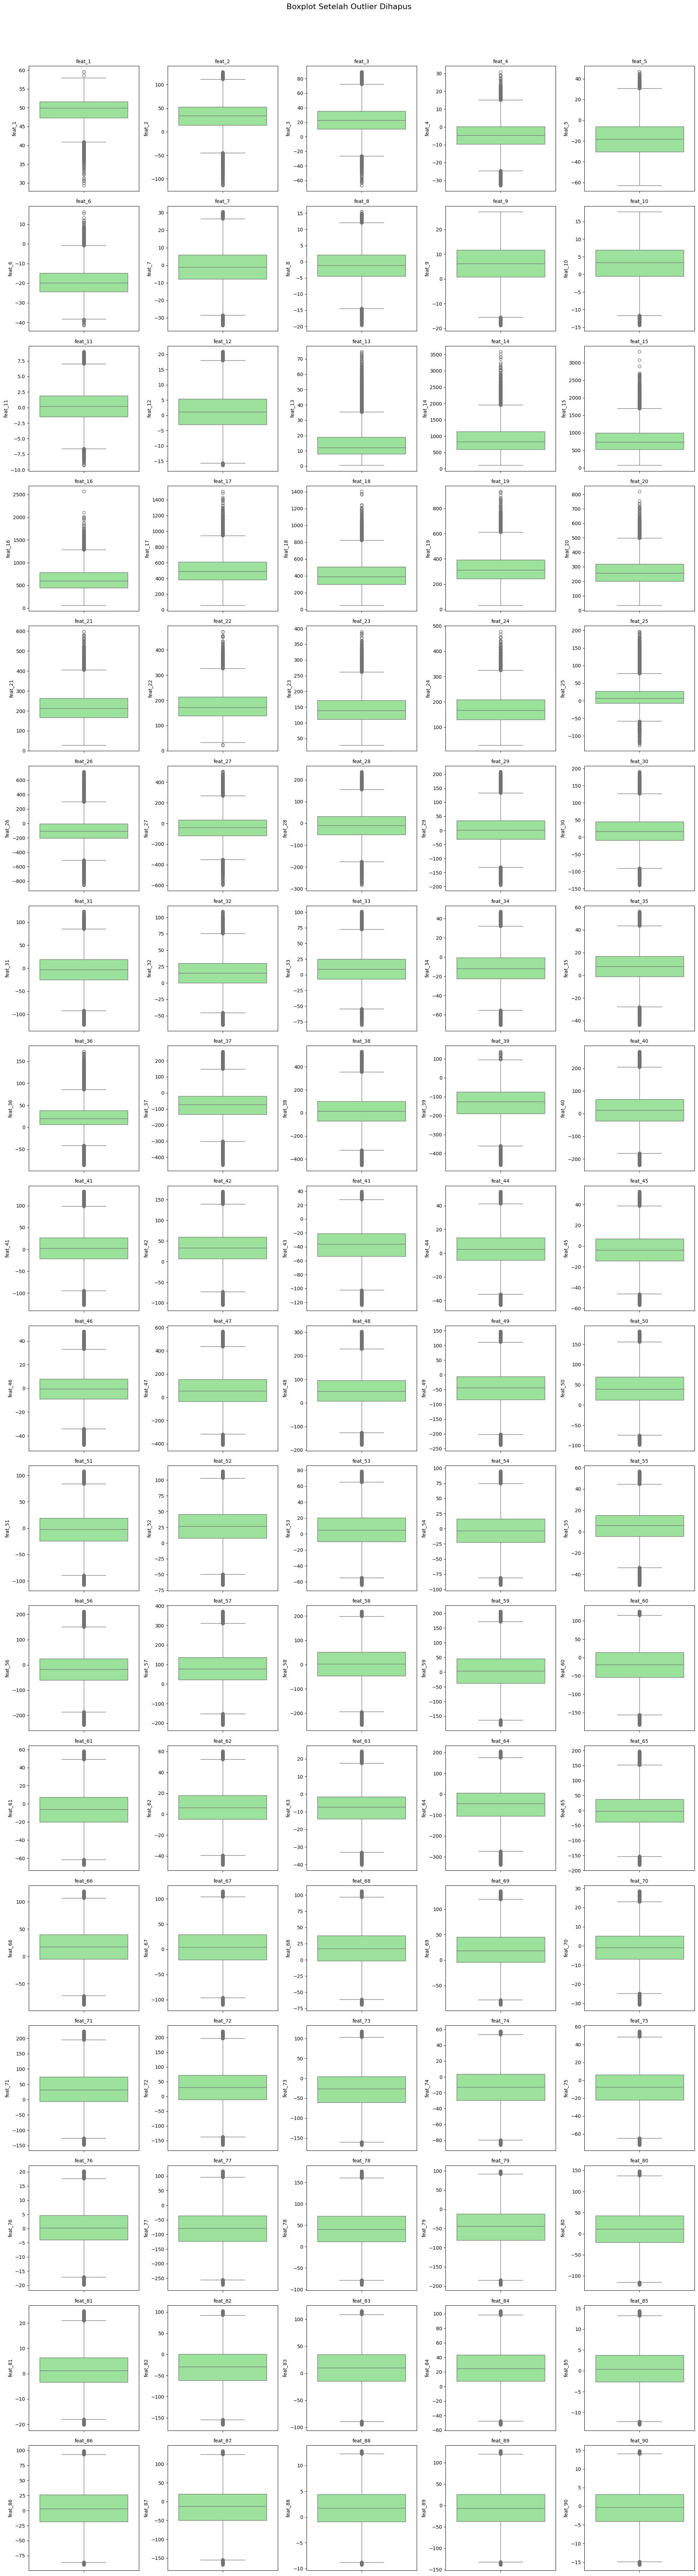

In [ ]:
n_features = len(selected_features)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 4))
for i, col in enumerate(selected_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_cleaned[col], color='lightgreen')
    plt.title(col, fontsize=10)
    plt.tight_layout()
plt.suptitle("Boxplot Setelah Outlier Dihapus", fontsize=16, y=1.02)
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[selected_features])  # Menggunakan df_cleaned yang sudah dibersihkan

print("\nX_scaled shape:", X_scaled.shape)


X_scaled shape: (40127, 90)


In [ ]:
X_clean = df_cleaned[selected_features]  # Gunakan df_cleaned untuk X
y_clean = df_cleaned['target']  # Gunakan df_cleaned untuk y

# 11. Membagi Data Menjadi Training dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

print(f"\nX_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))


X_train shape: (32101, 90), X_test shape: (8026, 90)


In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    print("GPU terdeteksi!")
else:
    print("GPU tidak terdeteksi.")

# Menampilkan informasi GPU
print("Daftar GPU yang terdeteksi:", physical_devices)

GPU tidak terdeteksi.
Daftar GPU yang terdeteksi: []


# MLP Dengan 3 Hidden Layer

In [ ]:
import tensorflow.keras.backend as K
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),  # Menentukan bentuk input berdasarkan data
    layers.Dense(256, activation='relu'),  # Hidden Layer 1 dengan 256 neuron
    layers.Dense(128, activation='relu'),  # Hidden Layer 2 dengan 128 neuron
    layers.Dense(64, activation='relu'),   # Hidden Layer 3 dengan 64 neuron
    layers.Dense(1)  # Output Layer (untuk regresi, output hanya satu nilai)
])

def rmse_loss(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss=rmse_loss, metrics=['mae'])


# Menampilkan ringkasan model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,513 (252.00 KB)

 Trainable params: 64,513 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train_scaled, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.8191 - mae: 0.6136 - val_loss: 0.7406 - val_mae: 0.5449
Epoch 2/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7221 - mae: 0.5262 - val_loss: 0.7256 - val_mae: 0.5326
Epoch 3/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6829 - mae: 0.4959 - val_loss: 0.7303 - val_mae: 0.5309
Epoch 4/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6465 - mae: 0.4715 - val_loss: 0.7365 - val_mae: 0.5382
Epoch 5/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6155 - mae: 0.4508 - val_loss: 0.7283 - val_mae: 0.5234
Epoch 6/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5772 - mae: 0.4255 - val_loss: 0.7583 - val_mae: 0.5369
Epoch 7/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5349 - mae: 0.3994 - val_loss: 0.7667 - val_mae: 0.5483
Epoch 8/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5080 - mae: 0.3835 - val_loss: 0.7575 - val_mae: 0.5394
Epoch 9/50
903/903 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - lo

In [ ]:
# Prediksi menggunakan data test
y_pred = model.predict(X_test)

# Hitung MSE, RMSE, dan R²
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

print(f"\nEvaluasi Model:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Evaluasi Model:
MSE: 0.6909601822145388
RMSE: 0.8312401471383217
R²: 0.3109658265619396


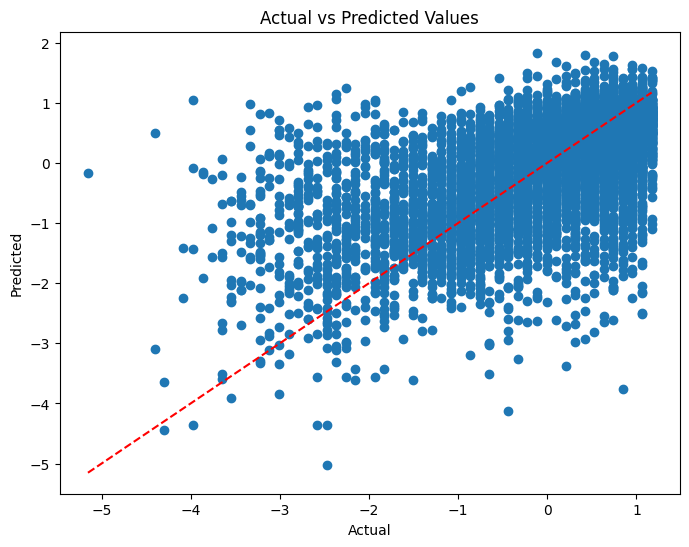

In [ ]:
# Visualisasi Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Langkah 1: Ambil threshold dari nilai target aktual (y_test_scaled)
threshold = y_test_scaled.mean()

# Langkah 2: Binarisasi target dan prediksi
y_true_class = (y_test_scaled >= threshold).astype(int)
y_pred_class = (y_pred.flatten() >= threshold).astype(int)

# Langkah 3: Hitung metrik klasifikasi
acc  = accuracy_score(y_true_class, y_pred_class)
prec = precision_score(y_true_class, y_pred_class)
rec  = recall_score(y_true_class, y_pred_class)
f1   = f1_score(y_true_class, y_pred_class)
auc  = roc_auc_score(y_true_class, y_pred.flatten())

# Tampilkan hasil
print(f"Threshold: {threshold:.4f}")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC-ROC  : {auc:.4f}")

Threshold: 0.0099
Accuracy : 0.7608
Precision: 0.7964
Recall   : 0.8080
F1 Score : 0.8021
AUC-ROC  : 0.8179


# Upgrade Model MLP

In [ ]:
from tensorflow.keras import layers, regularizers, models, optimizers, callbacks

model = models.Sequential([
    layers.InputLayer(input_shape=(90,)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),

    layers.Dense(1)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)

optimizer = optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback untuk menghentikan pelatihan saat validasi stagnan
early_stop = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

# Training
history = model.fit(
    X_train,
    y_train_scaled,  # pastikan sudah diskalakan jika target di-scale
    validation_split=0.1,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.4301 - mae: 0.7525 - val_loss: 0.9959 - val_mae: 0.5577
Epoch 2/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.0268 - mae: 0.5861 - val_loss: 0.8884 - val_mae: 0.5388
Epoch 3/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.9168 - mae: 0.5716 - val_loss: 0.7794 - val_mae: 0.5294
Epoch 4/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.8140 - mae: 0.5582 - val_loss: 0.7147 - val_mae: 0.5338
Epoch 5/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.7455 - mae: 0.5536 - val_loss: 0.6841 - val_mae: 0.5328
Epoch 6/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6992 - mae: 0.5457 - val_loss: 0.6618 - val_mae: 0.5185
Epoch 7/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6675 - mae: 0.5384 - val_loss: 0.6321 - val_mae: 0.5094
Epoch 8/50
1806/1806 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.6491 - mae: 0.5323 - val_loss: 0.6359 - val_mae: 0.5191
Epoch 9/50
1806/1806 ━━━━━━━━━━━━━━━━

In [ ]:
# Prediksi menggunakan data test
y_pred = model.predict(X_test)

# Hitung MSE, RMSE, dan R²
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

print(f"\nEvaluasi Model:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluasi Model:
MSE: 0.5558834480755616
RMSE: 0.745575917043705
R²: 0.4456660426581319


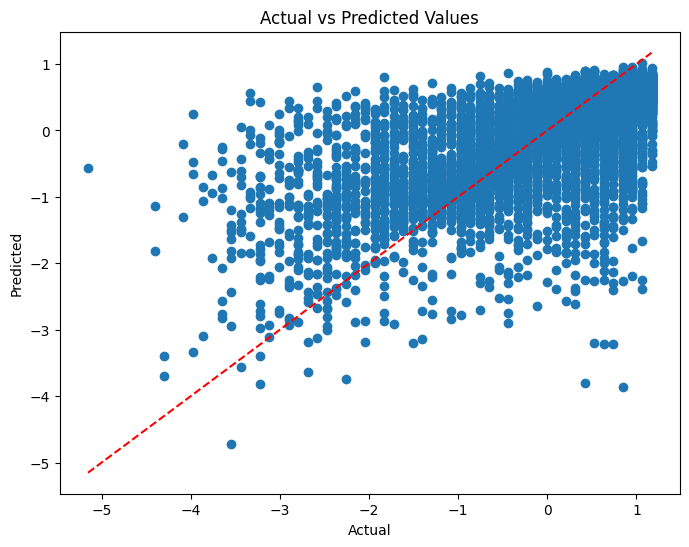

In [ ]:
# Visualisasi Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# MLP Residual

In [ ]:
from tensorflow.keras import Model, Input, layers, regularizers

# Input layer
input_layer = Input(shape=(X_train.shape[1],))

# Block 1
x = layers.Dense(512, activation='relu')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# Block 2
x1 = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Dropout(0.3)(x1)

# Block 3
x2 = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Dropout(0.3)(x2)

# Residual Connection: gabungkan x1 dan x2
res = layers.Concatenate()([x1, x2])
x3 = layers.Dense(64, activation='relu')(res)
x3 = layers.Dropout(0.2)(x3)

# Output
output = layers.Dense(1)(x3)

# Model
model = Model(inputs=input_layer, outputs=output)

# Compile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Summary
model.summary()

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 90)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 512)       │     46,592 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_31[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 512)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 256)       │    131,328 │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_32[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 256)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 128)       │     32,896 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_33[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 128)       │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ dropout_19[0][0], │
│ (Concatenate)       │                   │            │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 64)        │     24,640 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 64)        │          0 │ dense_34[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 1)         │         65 │ dropout_21[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 239,105 (934.00 KB)

 Trainable params: 237,313 (927.00 KB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
history = model.fit(
    X_train,
    y_train_scaled,
    validation_split=0.1,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 1.9730 - mae: 0.9134 - val_loss: 1.1160 - val_mae: 0.5781
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - loss: 1.1485 - mae: 0.6024 - val_loss: 0.9954 - val_mae: 0.5407
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 1.0129 - mae: 0.5620 - val_loss: 0.9176 - val_mae: 0.5412
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.8983 - mae: 0.5398 - val_loss: 0.8304 - val_mae: 0.5371
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.8095 - mae: 0.5353 - val_loss: 0.7599 - val_mae: 0.5278
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.7402 - mae: 0.5299 - val_loss: 0.6958 - val_mae: 0.5233
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.6790 - mae: 0.5211 - val_loss: 0.6825 - val_mae: 0.5388
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.6362 - mae: 0.5175 - val_loss: 0.6444 - val_mae: 0.5232
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━

In [ ]:
# Prediksi menggunakan data test
y_pred = model.predict(X_test)

# Hitung MSE, RMSE, dan R²
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

print(f"\nEvaluasi Model:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Evaluasi Model:
MSE: 0.5476120917873438
RMSE: 0.7400081700814821
R²: 0.45391434305222644


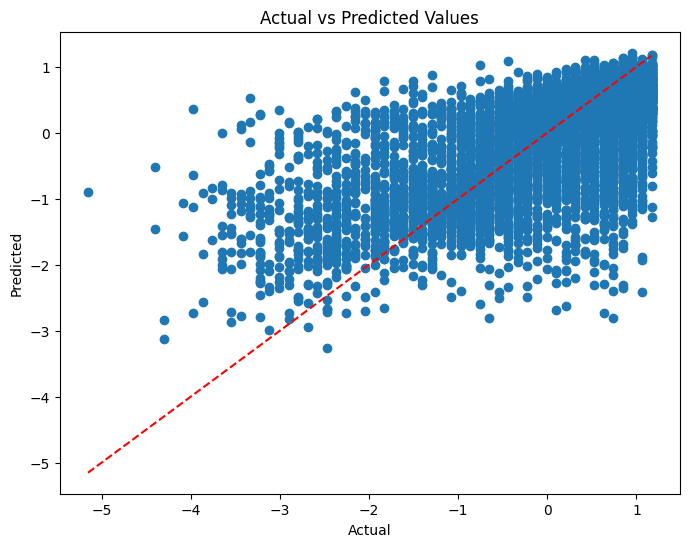

In [ ]:
# Visualisasi Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Langkah 1: Ambil threshold dari nilai target aktual (y_test_scaled)
threshold = y_test_scaled.mean()

# Langkah 2: Binarisasi target dan prediksi
y_true_class = (y_test_scaled >= threshold).astype(int)
y_pred_class = (y_pred.flatten() >= threshold).astype(int)

# Langkah 3: Hitung metrik klasifikasi
acc  = accuracy_score(y_true_class, y_pred_class)
prec = precision_score(y_true_class, y_pred_class)
rec  = recall_score(y_true_class, y_pred_class)
f1   = f1_score(y_true_class, y_pred_class)
auc  = roc_auc_score(y_true_class, y_pred.flatten())

# Tampilkan hasil
print(f"Threshold: {threshold:.4f}")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC-ROC  : {auc:.4f}")

Threshold: 0.0099
Accuracy : 0.7888
Precision: 0.8138
Recall   : 0.8404
F1 Score : 0.8269
AUC-ROC  : 0.8589


# Tuning

In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers, models, regularizers

def build_model(hp):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

    # Tuning jumlah hidden layers (2–5)
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=512, step=64),
            activation='relu',
            kernel_regularizer=regularizers.l2(0.001)
        ))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))

    model.add(layers.Dense(1))  # output layer untuk regresi

    # Tuning learning rate
    lr = hp.Choice('learning_rate', [1e-2, 1e-3, 5e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae']
    )
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='my_dir',
    project_name='mlp_tuning'
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    X_train, y_train_scaled,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Trial 10 Complete [00h 01m 38s]
val_loss: 0.6169356107711792

Best val_loss So Far: 0.5791895985603333
Total elapsed time: 00h 25m 39s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Buat ulang model dengan best hyperparameters
final_model = build_model(best_hps)
final_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         5,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 192)            │        12,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,041 (152.50 KB)

 Trainable params: 39,041 (152.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = final_model.fit(
    X_train,
    y_train_scaled,
    validation_split=0.1,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.2794 - mae: 0.7345 - val_loss: 0.9495 - val_mae: 0.6145
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9447 - mae: 0.6080 - val_loss: 0.7960 - val_mae: 0.5712
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.8203 - mae: 0.5775 - val_loss: 0.7193 - val_mae: 0.5514
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7199 - mae: 0.5517 - val_loss: 0.6828 - val_mae: 0.5477
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6968 - mae: 0.5570 - val_loss: 0.6483 - val_mae: 0.5476
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6609 - mae: 0.5487 - val_loss: 0.6357 - val_mae: 0.5374
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6407 - mae: 0.5447 - val_loss: 0.6133 - val_mae: 0.5291
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6258 - mae: 0.5408 - val_loss: 0.6090 - val_mae: 0.5356
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Prediksi pada test set
y_pred = final_model.predict(X_test).flatten()

# Mengembalikan nilai target jika sebelumnya di scaling
# y_test = scaler.inverse_transform(y_test)    # jika sebelumnya discaling
# y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()  # jika prediksi discaling

# MSE, RMSE, R²
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

print("\n📊 Evaluasi Model pada Test Set:")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

📊 Evaluasi Model pada Test Set:
MSE  : 0.5360
RMSE : 0.7321
R²   : 0.4655


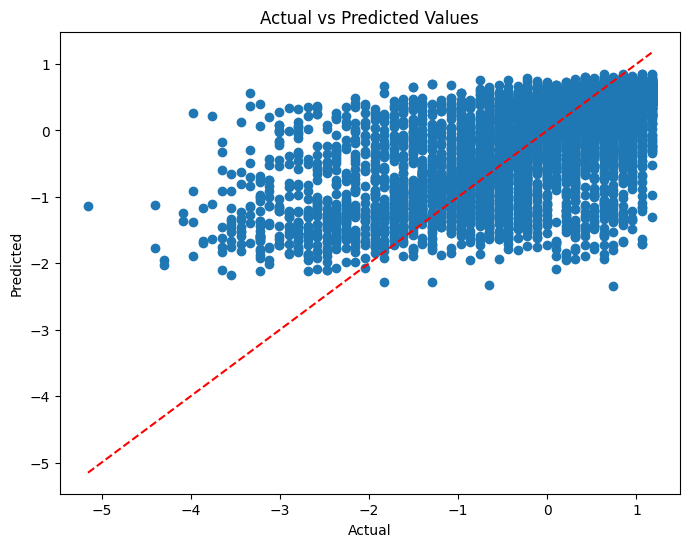

In [ ]:
# Visualisasi Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Langkah 1: Ambil threshold dari nilai target aktual (y_test_scaled)
threshold = y_test_scaled.mean()

# Langkah 2: Binarisasi target dan prediksi
y_true_class = (y_test_scaled >= threshold).astype(int)
y_pred_class = (y_pred.flatten() >= threshold).astype(int)

# Langkah 3: Hitung metrik klasifikasi
acc  = accuracy_score(y_true_class, y_pred_class)
prec = precision_score(y_true_class, y_pred_class)
rec  = recall_score(y_true_class, y_pred_class)
f1   = f1_score(y_true_class, y_pred_class)
auc  = roc_auc_score(y_true_class, y_pred.flatten())

# Tampilkan hasil
print(f"Threshold: {threshold:.4f}")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC-ROC  : {auc:.4f}")

Threshold: 0.0099
Accuracy : 0.7929
Precision: 0.8133
Recall   : 0.8501
F1 Score : 0.8313
AUC-ROC  : 0.8604


# DNN Huber Scheduler

In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras import models, layers, callbacks, regularizers, optimizers
from tensorflow.keras.losses import Huber
from tensorflow.keras.layers import LeakyReLU
import keras_tuner as kt

In [ ]:
def build_model(hp):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', 64, 512, step=64),
            activation='relu',
            kernel_regularizer=regularizers.l2(0.001)
        ))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1)))

    model.add(layers.Dense(1))

    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=hp.Choice('lr', [1e-2, 1e-3, 5e-4]),
        decay_steps=1000,
        decay_rate=0.9
    )

    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr_schedule),
        loss=Huber(),
        metrics=['mae']
    )
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    overwrite=True,
    directory='my_dir',
    project_name='dnn_huber_tuning'
)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


tuner.search(
    X_train, y_train_scaled,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Trial 5 Complete [00h 01m 46s]
val_loss: 0.22890129685401917

Best val_loss So Far: 0.22890129685401917
Total elapsed time: 00h 09m 04s


In [ ]:
best_hps = tuner.get_best_hyperparameters(1)[0]
final_model = build_model(best_hps)
final_model.summary()

history = final_model.fit(
    X_train, y_train_scaled,
    validation_split=0.1,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,313 (114.50 KB)

 Trainable params: 28,801 (112.50 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.8759 - mae: 1.0422 - val_loss: 0.5051 - val_mae: 0.6133
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5689 - mae: 0.7046 - val_loss: 0.4525 - val_mae: 0.5692
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4757 - mae: 0.6083 - val_loss: 0.4224 - val_mae: 0.5569
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4345 - mae: 0.5802 - val_loss: 0.3934 - val_mae: 0.5436
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4050 - mae: 0.5655 - val_loss: 0.3697 - val_mae: 0.5388
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3789 - mae: 0.5555 - val_loss: 0.3469 - val_mae: 0.5320
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3504 - mae: 0.5415 - val_loss: 0.3273 - val_mae: 0.5306
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3343 - mae: 0.5441 - val_loss: 0.3105 - val_mae: 0.5267
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

y_pred = final_model.predict(X_test).flatten()

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

print("\n📊 Evaluasi Model pada Test Set:")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

📊 Evaluasi Model pada Test Set:
MSE  : 0.5504
RMSE : 0.7419
R²   : 0.4512


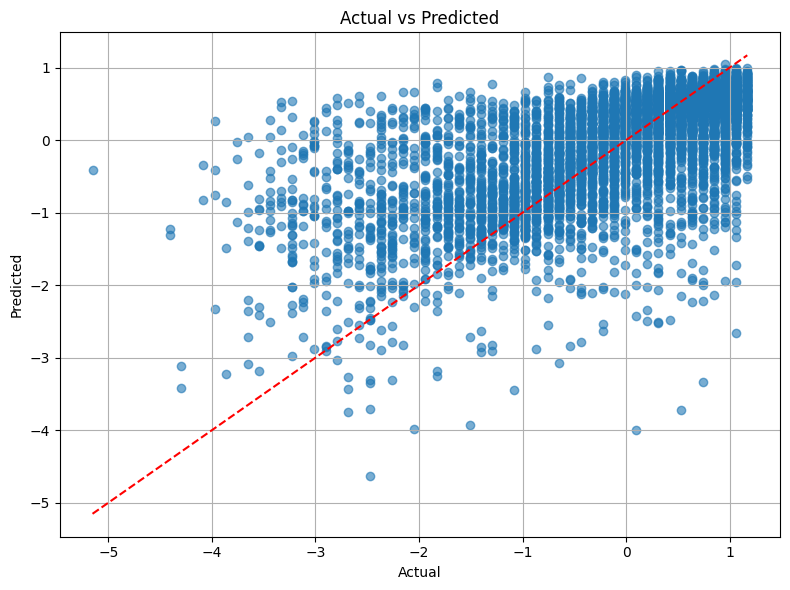

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

# Ubah Kolom Terakhir Jadi Target

In [ ]:
file_id = '1iir3m4hP09fCeOyC-Igx4RwXkuVAMz6m'
output = 'RegresiUTSTelkom.csv'

# Unduh file dari Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}&confirm=t', output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1iir3m4hP09fCeOyC-Igx4RwXkuVAMz6m&confirm=t
To: /content/RegresiUTSTelkom.csv
100%|██████████| 443M/443M [00:11<00:00, 38.0MB/s]


'RegresiUTSTelkom.csv'

In [ ]:
df = pd.read_csv(output)
df.columns = ['target'] + [f'feat_{i}' for i in range(1, df.shape[1])]
print("Nama kolom setelah direname:\n", df.columns.tolist()[:10])

Nama kolom setelah direname:
 ['target', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7', 'feat_8', 'feat_9']


In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
X = df.drop(columns='feat_90')
y = df['feat_90']

var_selector = VarianceThreshold(threshold=0.0)
X_var_filtered = var_selector.fit_transform(X)

# Simpan nama fitur yang lolos seleksi
selected_features = X.columns[var_selector.get_support()]
print(f"\nJumlah fitur setelah filter varian: {len(selected_features)} dari {X.shape[1]}")


Jumlah fitur setelah filter varian: 90 dari 90


In [ ]:
cor_with_target = df[selected_features].corrwith(df['feat_90'])
cor_sorted = cor_with_target.sort_values(key=np.abs, ascending=False)

top_features = cor_sorted.head(10).index.tolist()
print("\nTop 10 fitur dengan korelasi tertinggi terhadap target:")
print(cor_sorted.head(10))


Top 10 fitur dengan korelasi tertinggi terhadap target:
target     1.000000
feat_1     0.225345
feat_6    -0.187441
feat_3    -0.139575
feat_63   -0.126319
feat_40   -0.123996
feat_7     0.110461
feat_67   -0.102841
feat_46   -0.101340
feat_36   -0.101050
dtype: float64


In [ ]:
df_cleaned = df.copy()
for col in selected_features:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"\nJumlah data setelah menghapus semua outlier: {df_cleaned.shape[0]} dari {df.shape[0]}")


Jumlah data setelah menghapus semua outlier: 38829 dari 515130


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[selected_features])  # Menggunakan df_cleaned yang sudah dibersihkan

print("\nX_scaled shape:", X_scaled.shape)


X_scaled shape: (38829, 90)


In [ ]:
X_clean = df_cleaned[selected_features]  # Gunakan df_cleaned untuk X
y_clean = df_cleaned['feat_90']  # Gunakan df_cleaned untuk y

# 11. Membagi Data Menjadi Training dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

print(f"\nX_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))


X_train shape: (31063, 90), X_test shape: (7766, 90)


In [ ]:
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)  # Linear output untuk regresi
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Callback untuk menghentikan pelatihan saat validasi stagnan
early_stop = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

# Training
history = model.fit(
    X_train,
    y_train_scaled,  # pastikan sudah diskalakan jika target di-scale
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/15
437/437 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0442 - mae: 0.1276 - val_loss: 0.0174 - val_mae: 0.0470
Epoch 2/15
437/437 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0409 - mae: 0.1204 - val_loss: 0.0174 - val_mae: 0.0487
Epoch 3/15
437/437 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0400 - mae: 0.1183 - val_loss: 0.0195 - val_mae: 0.0599
Epoch 4/15
437/437 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0407 - mae: 0.1206 - val_loss: 0.0150 - val_mae: 0.0429
Epoch 5/15
437/437 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0376 - mae: 0.1160 - val_loss: 0.0302 - val_mae: 0.0993
Epoch 6/15
437/437 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0377 - mae: 0.1159 - val_loss: 0.0190 - val_mae: 0.0722
Epoch 7/15
437/437 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0351 - mae: 0.1137 - val_loss: 0.0174 - val_mae: 0.0629
Epoch 8/15
437/437 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0376 - mae: 0.1179 - val_loss: 0.0167 - val_mae: 0.0594
Epoch 9/15
437/437 ━━━━━━━━━━━━━━━━━━━━ 11s 14

In [ ]:
# Prediksi menggunakan data test
y_pred = model.predict(X_test)

# Hitung MSE, RMSE, dan R²
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)

print(f"\nEvaluasi Model:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Evaluasi Model:
MSE: 0.0031242484933078282
RMSE: 0.05589497735313816
R²: 0.9968782870772969


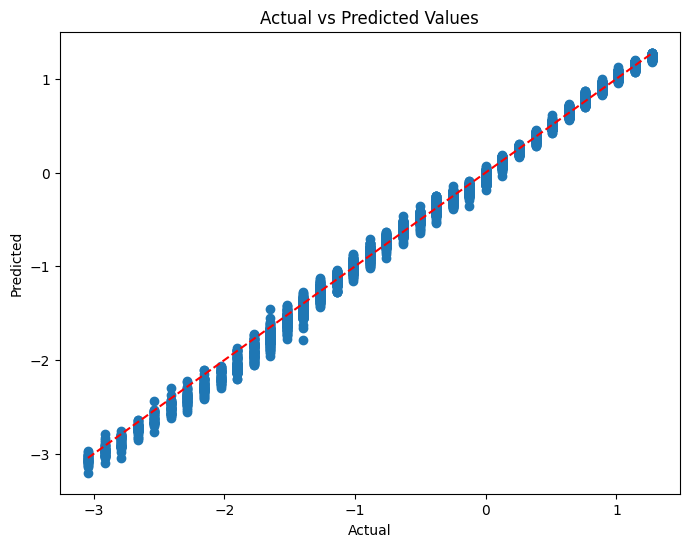

In [ ]:
# Visualisasi Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()